# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
pd.set_option('display.max_rows',15)
# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [327]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [328]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [329]:
quant_items = chipo.groupby('item_name').agg({'quantity': np.sum})
quant_items.T

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
quantity,55,66,91,12,10,25,211,4,6,126,...,36,4,31,56,87,97,1,6,18,8


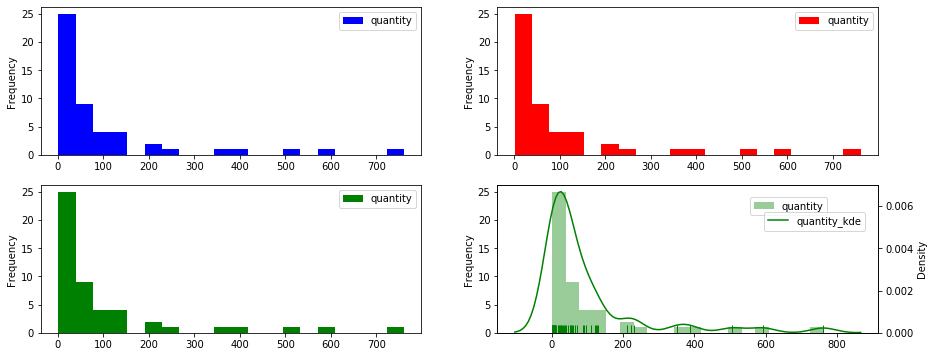

In [330]:
fig, axs = plt.subplots(2,2)
fig.set_facecolor('w')
fig.set_size_inches(15,6)

# Solution 1 : matplotlib
axs[0][0].hist(quant_items['quantity'],color='b', bins=20, label='quantity')
axs[0][0].set_ylabel('Frequency')
axs[0][0].legend()

# Solution 2 : pandas
quant_items.plot.hist('quantity',color='r', bins=20, ax=axs[0][1])

# Solution 3 : seaborn
sns.distplot(quant_items, color='green', bins=20, ax=axs[1][0],
             kde=False, norm_hist=False, rug=False ,label='quantity',
             hist_kws={"alpha": 1})
axs[1][0].set_ylabel('Frequency')
axs[1][0].legend()

# Solution 3bis : seaborn
sns.distplot(quant_items,color='g', bins=20, ax=axs[1][1],
             kde=False, norm_hist=False,
             rug=True ,label='quantity')
axs[1][1].set_ylabel('Frequency')
ax3_bis = axs[1][1].twinx()
ax3_bis.set_ylabel('Density')
sns.distplot(quant_items,color='g', bins=20, ax=ax3_bis,
             kde=True, hist=False,label='quantity_kde')
axs[1][1].legend(bbox_to_anchor=[0.88,0.95])
ax3_bis.legend(bbox_to_anchor=[0.98,0.85])

# Solution 4 : plotly ???
# fig = px.histogram(df, x="total_bill")
# fig.show()

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [331]:
chipo['item_price'] = pd.to_numeric(chipo['item_price'].str.slice(start=1))
chipo['order_price'] = chipo.groupby('order_id')['item_price'].transform(sum)
chipo['nb_items'] = chipo.groupby('order_id')['quantity'].transform(sum)
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price,order_price,nb_items
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56,4
1,1,1,Izze,[Clementine],3.39,11.56,4
2,1,1,Nantucket Nectar,[Apple],3.39,11.56,4
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56,4
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98,2
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67,2
6,3,1,Side of Chips,NaN,1.69,12.67,2
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,21.00,2
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,21.00,2
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70,2


In [332]:
quant_order = chipo.groupby('order_id')['quantity', 'item_price'].agg(sum)\
                   .rename(columns={'item_price':'order_price', 'quantity': 'nb_items'})
quant_order.head(2)

,nb_items,order_price
order_id,,
1,4,11.56
2,2,16.98


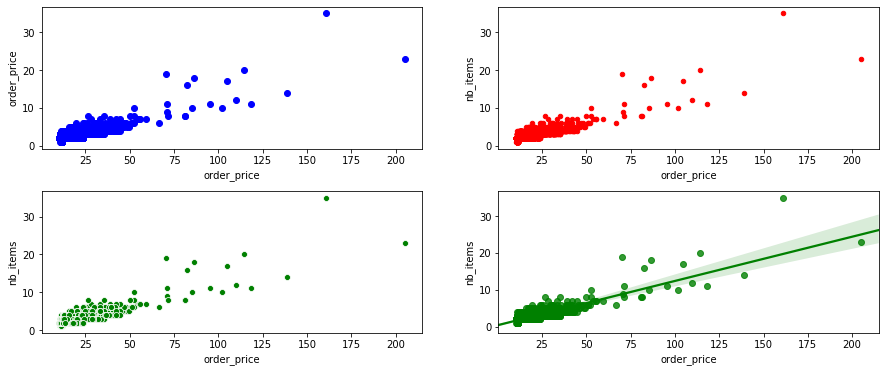

In [335]:
fig, axs = plt.subplots(2,2)
fig.set_facecolor('w')
fig.set_size_inches(15,6)
fig.subplots_adjust(hspace=0.3)

# Solution 1 : matplotlib
axs[0][0].scatter(quant_order['order_price'], quant_order['nb_items'], color='b')
axs[0][0].set_xlabel('order_price')
axs[0][0].set_ylabel('order_price')
# Solution 2 : pandas
quant_order.plot.scatter('order_price', 'nb_items', color='r', ax=axs[0][1])
# Solution 3 : seaborn
sns.scatterplot(quant_order['order_price'], quant_order['nb_items'], color='g', ax=axs[1][0])
# Solution 3bis : seaborn + regression plot
sns.regplot(quant_order['order_price'], quant_order['nb_items'], color='g', ax=axs[1][1])

In [341]:
# Solution 4 : plotly ????
# fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
# fig.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [174]:
chipo.head(1)

,order_id,quantity,item_name,choice_description,item_price,order_price,nb_items
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56,4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


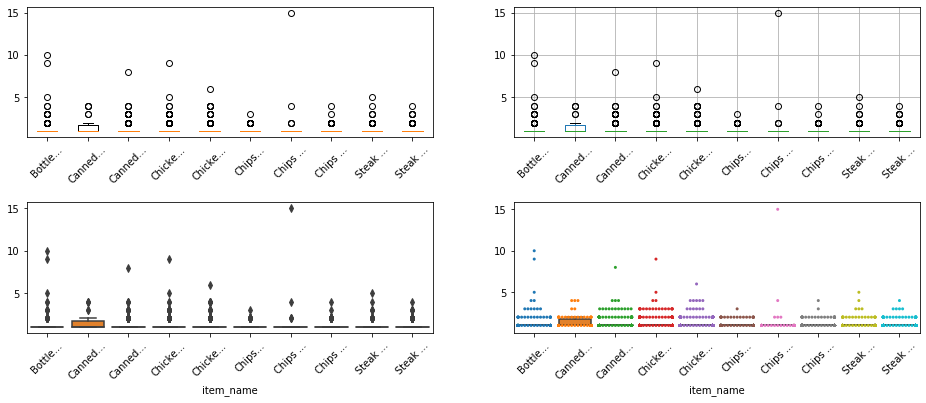

In [325]:
# For the 10 most ordered items, how many of them is ordered each time ? (boxplot + swarmplot)
most_ord_items = chipo.groupby('item_name')['quantity'].sum()\
                      .sort_values(ascending=False).iloc[0:10]
li_m_o_i = list(most_ord_items.index)
nb_m_o_i = most_ord_items.values

temp = chipo.set_index('item_name').loc[li_m_o_i][['order_id','quantity']].reset_index()\
            .groupby(['item_name','order_id'])['quantity'].sum().to_frame().reset_index()\
            .pivot(index='order_id', columns='item_name', values='quantity')

x_t_lab = [s+'...' for s in temp.columns.str.slice(0,6)]

fig, axs = plt.subplots(2,2)
fig.set_facecolor('w')
fig.subplots_adjust(hspace=0.5)
fig.set_size_inches(16,6)

# Solution 1: matplotlib
_ = [temp.iloc[:,i][temp.iloc[:,i].notna()].values for i,name in enumerate(temp.columns)]
axs[0][0].boxplot(_)#, positions=range(temp.shape[1]),notch=True)
axs[0][0].set_xticklabels(x_t_lab)
axs[0][0].tick_params(axis='x',rotation=45)

# Solution 2: pandas
temp.boxplot(ax=axs[0][1],  rot=45)# notch=True, showfliers=False
axs[0][1].set_xticklabels(x_t_lab)

# Solution 3: seaborn
sns.boxplot(data=temp, ax=axs[1][0])
axs[1][0].set_xticklabels(x_t_lab)
axs[1][0].tick_params(axis='x',rotation=45)

# Solution 3bis: seaborn box+swarmplot
sns.boxplot(data=temp, showfliers=False, ax=axs[1][1], zorder=1)
sns.swarmplot(data=temp, size=3, ax=axs[1][1], zorder=2)
# sns.violinplot(data=temp, ax=axs[1][1], zorder=2)
axs[1][1].set_xticklabels(x_t_lab)
axs[1][1].tick_params(axis='x',rotation=45)

plt.show()

In [343]:
# Solution 4: plotly
# fig = px.box(df, y="total_bill")
# fig.show()